#Implementing predictor from scratch

In [4]:
import copy, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'/content/Indicadores_municipales_sabana_DA (1).csv', encoding='latin1')

# Cleaning dataset
df = pd.get_dummies(df, columns=['gdo_rezsoc00', 'gdo_rezsoc05', 'gdo_rezsoc10'])
df = df.drop(columns=['ent', 'nom_ent', 'mun', 'clave_mun', 'nom_mun'])
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.fillna(df.mean())

# Training parameters
y_train = df['pobreza_patrim_10'][:1965].values
x_train = df.drop(columns=['pobreza_patrim_10'])[:1965].values

# Test parameters
y_test = df['pobreza_patrim_10'][1965:].values
x_test = df.drop(columns=['pobreza_patrim_10'])[1965:].values

# Initial parameters
initial_b = 0
initial_w = np.random.rand(145)  # Initialize weights with small random values

iterations = 1000
alpha = 0.00000000000001  # Reduced learning rate

def predict(x, w, b):
    p = np.dot(x, w) + b
    return p

def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return cost

def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            J_history.append(cost_function(X, y, w, b))

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history

w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                            compute_cost, compute_gradient,
                                            alpha, iterations)

mse_test = compute_cost(x_test, y_test, w_final, b_final)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
print(f"MSE on the dataset: {mse_test:0.2f}")

Iteration    0: Cost 295378463159.21   
Iteration  100: Cost 229978787852.20   
Iteration  200: Cost 179085981580.11   
Iteration  300: Cost 139482080339.99   
Iteration  400: Cost 108662940288.22   
Iteration  500: Cost 84679895626.74   
Iteration  600: Cost 66016540497.31   
Iteration  700: Cost 51492843552.01   
Iteration  800: Cost 40190532169.05   
Iteration  900: Cost 31395028205.83   
b,w found by gradient descent: -0.00,[ 0.01770631  0.06252633  0.81226652  0.71411984  0.61117817  0.14621761
  0.48501569  0.9498287   0.7268064   0.4900067   0.27681346  0.518477
  0.98888657  0.10796168  0.68761638  0.30852855  0.41592166  0.93964935
  0.80214622  0.21139237  0.28867903  0.0340756   0.74366284  0.73964075
  0.30750828  0.42009403  0.62972829  0.33999623  0.41281815  0.67940598
  0.41707801  0.14085378  0.4247438  -0.19028718  0.80291152  0.24918591
  0.55896654  0.612979    0.95959836  0.38109613  0.13906653  0.89413157
  0.14454856  0.37858783  0.11739979  0.37139597  0.8957221

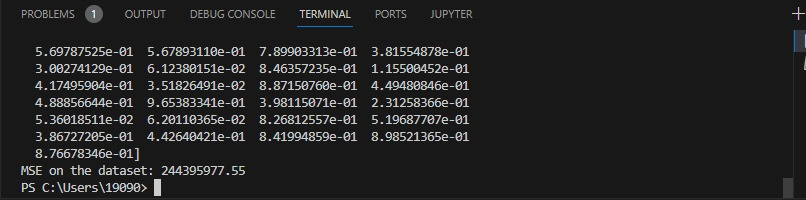

Data Preparation:

It reads a CSV file containing a dataset.
It performs some data cleaning steps:
Converts categorical variables into one-hot encoded format using pd.get_dummies.
Drops unnecessary columns ('ent', 'nom_ent', 'mun', 'clave_mun', 'nom_mun').
Converts the entire DataFrame to numeric values.
Removes any rows with missing values.
Fills any remaining NaN values with the mean of the column.


Splitting the Data:

It divides the dataset into training and testing sets:
x_train: Features for training (first 1965 rows).
y_train: Target variable for training (first 1965 rows).
x_test: Features for testing (rows after the first 1965).
y_test: Target variable for testing (rows after the first 1965).


Initialization:

It sets up initial values for the model parameters:
initial_b: Initial intercept (bias) value.
initial_w: Initial weights (coefficients) with small random values.
iterations: Number of iterations for gradient descent.
alpha: Learning rate (small value to control step size).
Prediction and Cost Functions:

predict: Defines a function to make predictions using the linear model f_wb(x) = wx + b.
compute_cost: Calculates the mean squared error (MSE) or cost function.


Gradient Calculation:

compute_gradient: Computes the gradients of the cost function with respect to the weights and bias.


Gradient Descent:

gradient_descent: Implements the gradient descent optimization algorithm. It updates the weights and bias iteratively in the direction that minimizes the cost.


Training:

It applies the gradient descent algorithm to learn the optimal weights and bias on the training data.
Testing:

It evaluates the model's performance on the testing data by calculating the MSE.


Results:

It prints out the final values of the intercept and weights learned by the gradient descent.
It displays the MSE on the dataset.
In summary, this code aims to build a multivariate linear regression model using gradient descent for predictive modeling. It uses the MSE as the evaluation metric and applies the model to both training and testing data. The final results include the learned coefficients and the MSE on the testing data.





# Predictor using sklearn library.

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv(r'/content/Indicadores_municipales_sabana_DA (1).csv', encoding='latin1')
df = pd.get_dummies(df, columns=['gdo_rezsoc00', 'gdo_rezsoc05', 'gdo_rezsoc10'])
df = df.drop(columns=['ent', 'nom_ent', 'mun', 'clave_mun', 'nom_mun'])
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.fillna(df.mean())

X = df.drop(columns=['pobreza_patrim_10'])
y = df['pobreza_patrim_10']

X_train = X[:1965]
y_train = y[:1965]
X_test = X[1965:]
y_test = y[1965:]

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred)

print(f"Coefficients (w): {model.coef_}")
print(f"Intercept (b): {model.intercept_}")
print(f"MSE on the test set: {mse_test:.2f}")

Coefficients (w): [ 4.66577842e-02  8.81814874e+04  2.71064548e+03  2.71065847e+03
  7.11630405e+04  1.12219803e+05  9.24910013e+04  4.64164742e-02
  7.28682228e-02  4.08474272e-02  5.46855546e-02  5.83369115e-02
  6.10195643e-02  2.13279055e+04  1.87761770e-02 -1.97289650e+04
  3.39003808e-02  3.67314585e-03  2.06476526e-03 -3.19068494e-02
  6.23428197e-03  6.17722659e-03 -3.10440891e-02 -4.12940797e-02
 -4.66556911e-02 -7.81340610e-06 -4.37318578e-06 -1.09262969e-05
  5.81799270e-06  7.55608517e-07  8.44731752e-08 -1.55837206e-02
 -1.56597693e-05 -5.33400049e-03 -1.53140500e-05 -2.58925149e-04
  5.26610092e-05  7.74294023e+00 -2.25848089e+00 -1.43711865e+00
 -8.90809070e-01 -2.64684812e-01  3.32336997e-02 -8.89756385e-01
  2.26973825e-01  3.91336851e-01  5.10735203e-01 -2.27620554e+00
  8.09892096e-01 -8.74667771e+00  1.28710261e+00 -1.84448436e-06
  4.72587999e-07 -5.08780067e-06 -1.64486931e+03 -8.01195013e-03
 -1.49011166e+02 -2.27582156e+03  5.22411911e-02 -2.46786035e+02
 -1.340

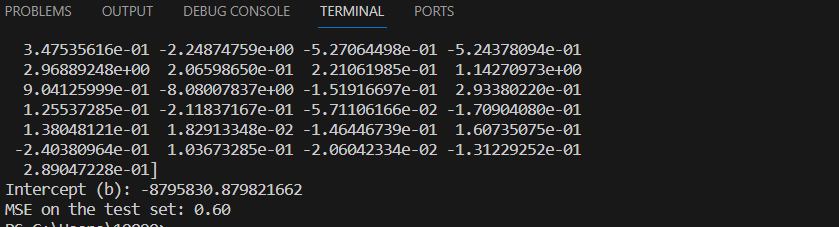

Data Preparation:

It reads a CSV file containing a dataset.
It performs some data cleaning steps:
Converts categorical variables into one-hot encoded format using pd.get_dummies.
Drops unnecessary columns ('ent', 'nom_ent', 'mun', 'clave_mun', 'nom_mun').
Converts the entire DataFrame to numeric values.
Removes any rows with missing values.
Fills any remaining NaN values with the mean of the column.
Feature and Target Preparation:

It separates the features (X) and the target variable (y) from the cleaned DataFrame.


Splitting the Data:

It divides the dataset into training and testing sets:
X_train: Features for training (first 1965 rows).
y_train: Target variable for training (first 1965 rows).
X_test: Features for testing (rows after the first 1965).
y_test: Target variable for testing (rows after the first 1965).
Model Initialization:

It creates an instance of the LinearRegression model.

Model Training:

It fits the linear regression model to the training data using model.fit(X_train, y_train).
Prediction:

It uses the trained model to make predictions on the test set with y_pred = model.predict(X_test).

Model Evaluation:

It calculates the mean squared error (MSE) on the test set using mean_squared_error(y_test, y_pred).
Results:

It prints out the learned coefficients (weights) and the intercept term (bias) of the linear regression model.
It displays the MSE on the test set.
In summary, this code applies a multivariate linear regression model using the scikit-learn library. It utilizes the MSE as the evaluation metric and provides the learned coefficients, intercept, and the MSE on the testing data. This approach leverages a well-established library for machine learning, making the process more concise and efficient.

#Why the results are so different?

* The use of machine learning libraries simplifies the implementation by providing pre-built functions for tasks like model training, prediction, and evaluation.

* Standardization is applied to ensure that features are on a similar scale. This is important for models like Linear Regression that rely on the relative scales of features.

* The Linear Regression model in scikit-learn handles weight initialization, optimization, and other details internally, which can lead to more stable and efficient training.

* Scikit-learn provides a wide range of machine learning algorithms, making it a versatile library for various types of regression and classification tasks.

* The use of established libraries often leads to more efficient and effective code, as it leverages years of community-driven development and optimization.